In [1]:
#dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [2]:
PPP_data = pd.read_csv('PPP Data/PPP Data 150k GA.csv')
PPP_data.head()

,Loan Amount,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD
0,"$149,998.30",DECATUR,GA,30033,621210.0,Limited Liability Company(LLC),Unanswered,Male Owned,Unanswered,NaN,14.0,4/14/2020,Newton Federal Bank,GA - 04
1,"$149,981.92",BLACKSHEAR,GA,31516,713910.0,Non-Profit Organization,White,Male Owned,Unanswered,Y,32.0,4/28/2020,Primesouth Bank,GA - 01
2,"$149,952.00",ELLENWOOD,GA,30294,812199.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,14.0,6/18/2020,WebBank,GA - 04
3,"$149,952.00",DECATUR,GA,30034,484121.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,11.0,6/20/2020,WebBank,GA - 04
4,"$149,924.00",ATLANTA,GA,30338,339116.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,0.0,4/29/2020,"Wells Fargo Bank, National Association",GA - 06


In [3]:
total_zip = PPP_data["Zip"].nunique()
total_zip

877

In [4]:
PPP_data.rename(columns = {" LoanAmount ":"Loan Amount"}, inplace=True)

In [5]:
PPP_data.columns

Index([' Loan Amount ', 'City', 'State', 'Zip', 'NAICSCode', 'BusinessType',
       'RaceEthnicity', 'Gender', 'Veteran', 'NonProfit', 'JobsRetained',
       'DateApproved', 'Lender', 'CD'],
      dtype='object')

In [6]:
def elises_func(stringy):
        our_float = stringy.replace("   ","").replace("  ","").replace(" ","").replace(",","").replace("$","").replace("-","")
        if not our_float:
            our_float = 0
        else:
            our_float = float(our_float)
        return our_float

In [7]:
PPP_data.count()

 Loan Amount     138519
City             138519
State            138519
Zip              138519
NAICSCode        136247
BusinessType     138486
RaceEthnicity    138519
Gender           138519
Veteran          138519
NonProfit          3832
JobsRetained     128834
DateApproved     138519
Lender           138519
CD               138519
dtype: int64

In [8]:
PPP_data["Loan Amount"] = PPP_data["Loan Amount"].apply(elises_func)
PPP_data.head()

KeyError: 'Loan Amount'

In [ ]:
#which Race/Ethnicity had the most applications?
PPP_data['RaceEthnicity'].value_counts()

In [9]:
labels = ["Unanswered", "White", "Asian", "Black or African American", "Hispanic", "American Indian or Alaska Native", "Puerto Rican"]

# The values of each section
sizes = [124059, 8522, 3974, 1374, 524, 65, 1]

# The colors of each section
colors = ["red", "orange", "lightcoral", "lightskyblue", "green", "yellow", "maroon"]

# 
explode = (0, 0, 0, 0, 0, 0, 0)

([<matplotlib.patches.Wedge at 0x7fc8704dd8d0>,
 [Text(0.5699905614595273, -0.9408032524641128, 'Unanswered'),
  Text(-0.43851120696383383, 1.008815107622364, 'White'),
  Text(-0.7031121004081315, 0.8459511654106671, 'Asian'),
  Text(-0.8003020910988616, 0.7546632116267425, 'Black or African American'),
  Text(-0.83203622384566, 0.7195246501744433, 'Hispanic'),
  Text(-0.8415734297794635, 0.7083460752268136, 'American Indian or Alaska Native'),
  Text(-0.8426327894588581, 0.707085555027667, 'Puerto Rican')],
 [Text(0.31090394261428755, -0.5131654104349705, '89.6%'),
  Text(-0.23918793107118205, 0.5502627859758348, '6.2%'),
  Text(-0.3835156911317081, 0.4614279084058183, '2.9%'),
  Text(-0.43652841332665177, 0.41163447906913225, '1.0%'),
  Text(-0.45383794027945085, 0.3924679910042418, '0.4%'),
  Text(-0.45904005260698, 0.38637058648735284, '0.0%'),
  Text(-0.45961788515937707, 0.385683030015091, '0.0%')])

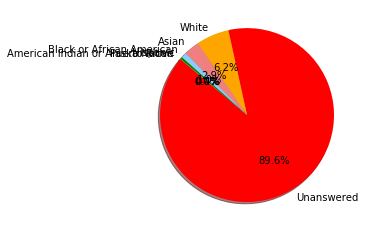

In [13]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

In [14]:
#take out "Unanswered" to see what results show up
labels = ["White", "Asian", "Black or African American", "Hispanic", "American Indian or Alaska Native", "Puerto Rican"]

# The values of each section
sizes = [8522, 3974, 1374, 524, 65, 1]

# The colors of each section
colors = ["red", "orange", "lightcoral", "lightskyblue", "green", "yellow"]

# 
explode = (0, 0, 0, 0, 0, 0)

([<matplotlib.patches.Wedge at 0x7fc870492650>,
 [Text(-0.4459543521970272, -1.0055469734211973, 'White'),
  Text(0.8221334657703597, 0.7308191051555897, 'Asian'),
  Text(-0.34370468504011753, 1.0449244419963932, 'Black or African American'),
  Text(-0.733672611005425, 0.8195880061716877, 'Hispanic'),
  Text(-0.8322676319289799, 0.7192569699650663, 'American Indian or Alaska Native'),
  Text(-0.8424953014243388, 0.7072493669689022, 'Puerto Rican')],
 [Text(-0.24324782847110574, -0.548480167320653, '58.9%'),
  Text(0.44843643587474163, 0.3986286028121398, '27.5%'),
  Text(-0.18747528274915498, 0.5699587865434872, '9.5%'),
  Text(-0.4001850605484136, 0.44704800336637507, '3.6%'),
  Text(-0.4539641628703526, 0.3923219836173088, '0.4%'),
  Text(-0.45954289168600293, 0.3857723819830375, '0.0%')])

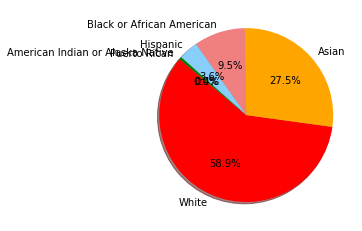

In [15]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

In [16]:
# Clean up Employer category. Replace 'Self Employed' and 'Self' with 'Self-Employed'
PPP_data['RaceEthnicity'] = PPP_data['RaceEthnicity'].replace(
    {'Puerto Rican': 'Hispanic'})
PPP_data['RaceEthnicity'].value_counts()

Unanswered                          124059
White                                 8522
Asian                                 3974
Black or African American             1374
Hispanic                               525
American Indian or Alaska Native        65
Name: RaceEthnicity, dtype: int64

In [22]:
#take out "Unanswered" to see what results show up, as well as a new one with Hispanic/Puerto Rican combined
labels = ["White", "Asian", "Black or African American", "Hispanic", "American Indian or Alaska Native"]

# The values of each section
sizes = [8522, 3974, 1374, 525, 65]

# The colors of each section
colors = ["red", "orange", "lightcoral", "lightskyblue", "green"]

# 
explode = (0.4, 0.4, 0.4, 0.4, 0.4)

([<matplotlib.patches.Wedge at 0x16b3f27bdc8>,
 [Text(-0.6081195711777644, -1.3712004183016326, 'White'),
  Text(1.1210910896868542, 0.9965715070303496, 'Asian'),
  Text(-0.46868820687288754, 1.424896966358718, 'Black or African American'),
  Text(-1.0007054428745301, 1.1174026206346979, 'Hispanic'),
  Text(-1.135336481137943, 0.9803117231765177, 'American Indian or Alaska Native')],
 [Text(-0.4054130474518429, -0.9141336122010884, '58.9%'),
  Text(0.7473940597912361, 0.6643810046868996, '27.5%'),
  Text(-0.312458804581925, 0.9499313109058121, '9.5%'),
  Text(-0.6671369619163534, 0.7449350804231318, '3.6%'),
  Text(-0.7568909874252953, 0.6535411487843451, '0.4%')])

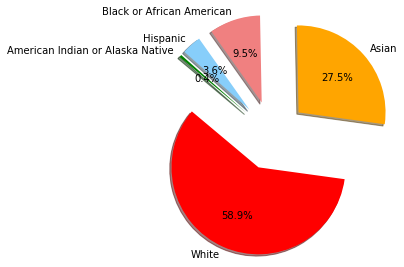

In [23]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

In [19]:
#Which Race/Ethnicity Recieved the Most Money? LBR=Loan By Race
LBR_df = PPP_data.groupby("RaceEthnicity").sum()["Loan Amount"]
LBR_df

RaceEthnicity
American Indian or Alaska Native    3.060811e+06
Asian                               1.331491e+08
Black or African American           4.452599e+07
Hispanic                            2.112222e+07
Unanswered                          3.800887e+09
White                               3.850873e+08
Name: Loan Amount, dtype: float64

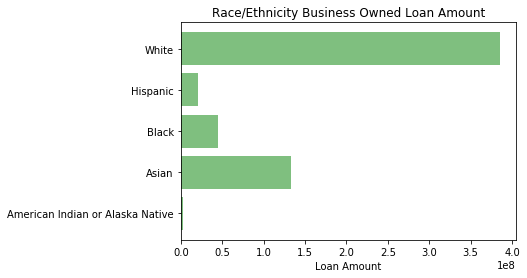

In [26]:
#graph it
LBR_df = PPP_data.groupby("RaceEthnicity").sum()["Loan Amount"]
objects = ('American Indian or Alaska Native', 'Asian', 'Black', 'Hispanic','White')
y_pos = np.arange(len(objects))
performance = [3.060811e+06,1.331491e+08,4.452599e+07,2.112222e+07,3.850873e+08]

plt.barh(y_pos, performance, color="g", align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Loan Amount')
plt.title('Race/Ethnicity Business Owned Loan Amount')

plt.show()